$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [34]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in C:\Users\shahar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-27 Python-3.8.12 torch-2.3.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


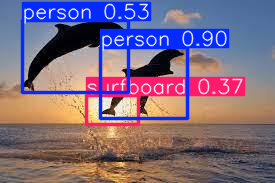

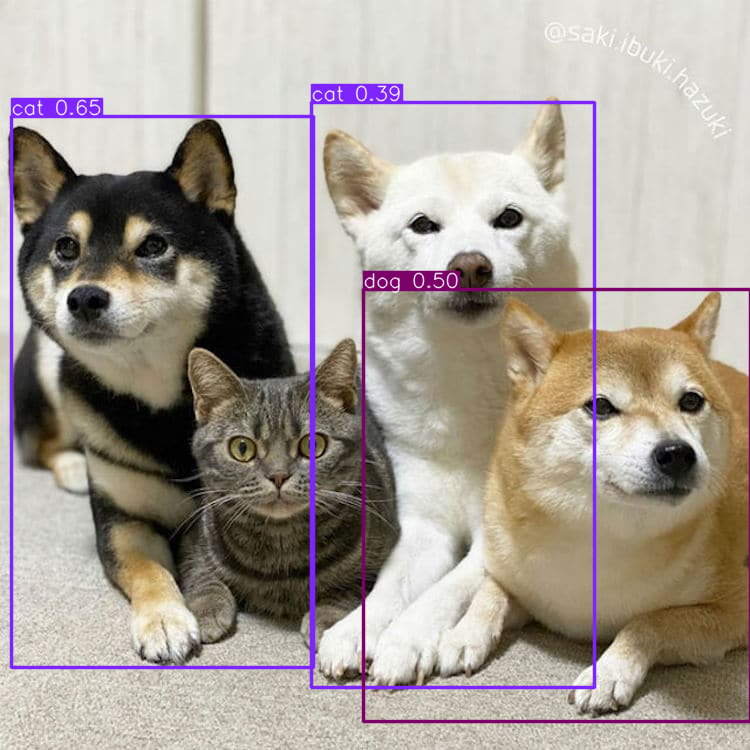

image 1/2: 183x275 2 persons, 1 surfboard
image 2/2: 750x750 2 cats, 1 dog
Speed: 26.6ms pre-process, 428.3ms inference, 2.2ms NMS per image at shape (2, 3, 640, 640)


In [37]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
pictures = model([img1, img2])
pictures.show()
pictures.print()


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [36]:
display_answer(hw2.answers.part6_q1)


NameError: name 'display_answer' is not defined

## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

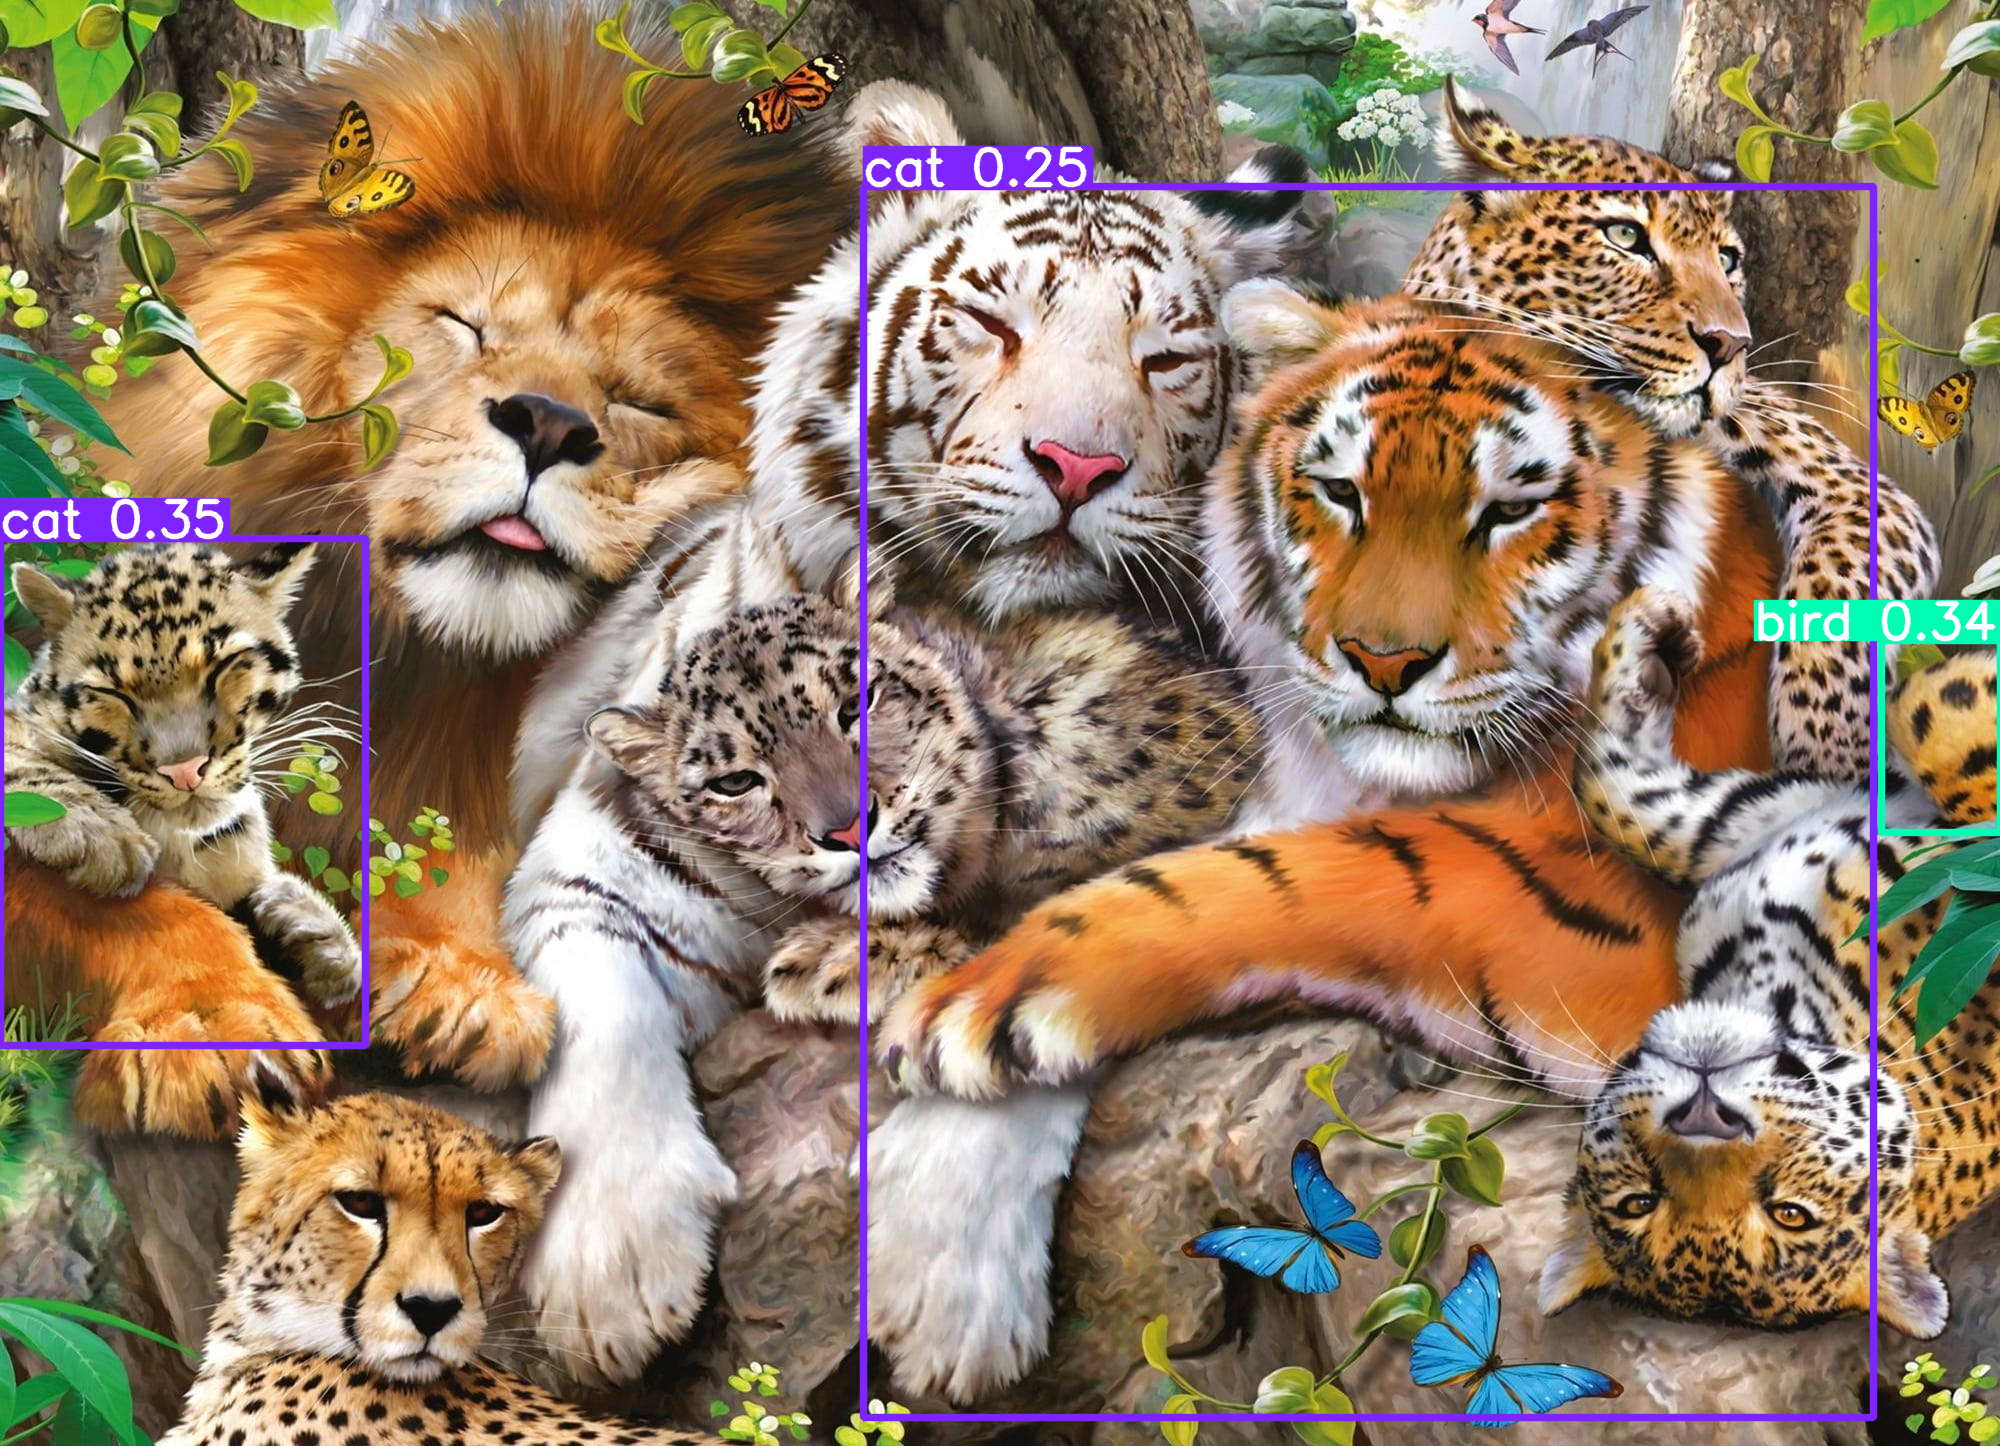

image 1/1: 1446x2000 1 bird, 2 cats
Speed: 131.0ms pre-process, 422.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)


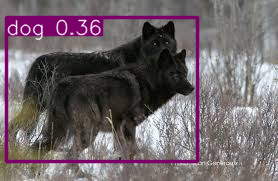

image 1/1: 181x278 1 dog
Speed: 17.1ms pre-process, 397.8ms inference, 2.2ms NMS per image at shape (1, 3, 416, 640)


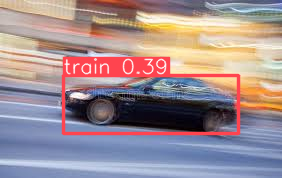

image 1/1: 178x282 1 train
Speed: 7.5ms pre-process, 351.0ms inference, 2.2ms NMS per image at shape (1, 3, 416, 640)


In [38]:

results = model('imgs/lions.jpg')
results.show()
results.print()
results = model('imgs/wolf.jpg')
results.show()
results.print()
results = model('imgs/blur1.jpg')
results.show()
results.print()


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

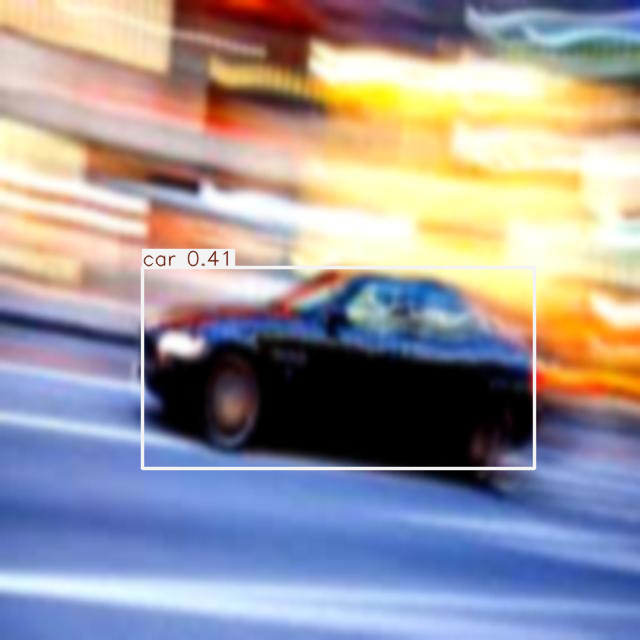

image 1/1: 640x640 1 car
Speed: 18.1ms pre-process, 539.5ms inference, 4.3ms NMS per image at shape (1, 3, 640, 640)


In [55]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

picture = cv2.cvtColor(cv2.imread('imgs/blur1.jpg'), cv2.COLOR_BGR2RGB)
bright = ImageEnhance.Brightness(ImageEnhance.Contrast(Image.fromarray(picture)).enhance(1.7))
blur = bright.enhance(1.0).filter(ImageFilter.GaussianBlur(radius=1.1))
gray_color = blur.filter(ImageFilter.UnsharpMask(radius=2.1, percent=149, threshold=3)).convert('L')
new_picture = 'imgs/new_picture.jpeg'
Image.fromarray(np.array(blur)).convert('RGB').resize((640, 640)).save(new_picture)
pictures = model('imgs/new_picture.jpeg')
pictures.show()
pictures.print()


In [ ]:
display_answer(hw2.answers.part6_bonus)
